# RecDP LLM - Quality Assessment

This component is using gpt3 to score each text sample and identify high quality samples.

Return value is a number ranging from 0 to 1, higher is better

# Get Started

## 1. Install pyrecdp and dependencies

In [ ]:
! DEBIAN_FRONTEND=noninteractive apt-get install -qq -y openjdk-8-jre
! pip install -q pyrecdp --pre
# ! pip install 'git+https://github.com/intel/e2eAIOK.git#egg=pyrecdp&subdirectory=RecDP'

## 2. Prepare your data

In [3]:
%mkdir -p /content/test_data
%cd /content/test_data
!wget https://raw.githubusercontent.com/intel/e2eAIOK/main/RecDP/tests/data/llm_data/arxiv_sample_100.jsonl
!wget https://raw.githubusercontent.com/intel/e2eAIOK/main/RecDP/tests/data/llm_data/github_sample_50.jsonl
!wget https://raw.githubusercontent.com/intel/e2eAIOK/main/RecDP/tests/data/llm_data/tiny_c4_sample.jsonl

/content/test_data
--2023-11-10 06:16:48--  https://raw.githubusercontent.com/intel/e2eAIOK/main/RecDP/tests/data/llm_data/arxiv_sample_100.jsonl
Resolving proxy-prc.intel.com (proxy-prc.intel.com)... 10.240.252.16
Connecting to proxy-prc.intel.com (proxy-prc.intel.com)|10.240.252.16|:912... connected.
Proxy request sent, awaiting response... 200 OK
Length: 5799643 (5.5M) [text/plain]
Saving to: ‘arxiv_sample_100.jsonl’

arxiv_sample_100.js 100%[===================>]   5.53M  2.08MB/s    in 2.7s    

2023-11-10 06:16:52 (2.08 MB/s) - ‘arxiv_sample_100.jsonl’ saved [5799643/5799643]

--2023-11-10 06:16:53--  https://raw.githubusercontent.com/intel/e2eAIOK/main/RecDP/tests/data/llm_data/github_sample_50.jsonl
Resolving proxy-prc.intel.com (proxy-prc.intel.com)... 10.240.252.16
Connecting to proxy-prc.intel.com (proxy-prc.intel.com)|10.240.252.16|:912... connected.
Proxy request sent, awaiting response... 200 OK
Length: 227913 (223K) [text/plain]
Saving to: ‘github_sample_50.jsonl’

githu

## 3. Quality Assessment

### 3.1 Process with Quality Scorer

In [1]:
from pyrecdp.LLM import TextPipeline, ResumableTextPipeline
from pyrecdp.primitives.operations import *

pipeline = ResumableTextPipeline()
pipeline.enable_statistics()
ops = [
    JsonlReader("/content/test_data/"),
    TextQualityScorer(),
    ParquetWriter("ResumableTextPipeline_output")
]
pipeline.add_operations(ops)
ret = pipeline.execute()
del pipeline

JAVA_HOME is not set, use default value of /usr/lib/jvm/java-8-openjdk-amd64/


/opt/intel/oneapi/intelpython/latest/envs/llm_data/lib/python3.9/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


2023-11-10 06:23:37.195 | WARNING  | pyrecdp.LLM.TextPipeline:enable_statistics:214 - Enabling this option will result in a decrease in execution speed
[DatasetReader, PerfileSourcedJsonlReader, TextQualityScorer, PerfileParquetWriter]
Will assign 48 cores and 412162 M memory for spark


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/10 06:23:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


per core memory size is 8.385 GB and shuffle_disk maximum capacity is 8589934592.000 GB
execute with spark for global tasks started ...
DatasetReader
2023-11-10 06:23:40.927 | INFO     | pyrecdp.LLM.TextPipeline:execute:365 - DatasetReader: A total of 0 rows of data were processed, using 0 seconds, with 0 rows modified or removed, 0 rows of data remaining.
execute with spark for global tasks took 0.002735915593802929 sec
PerfileSourcedJsonlReader


ResumableTextPipeline, current on arxiv_sample_100.jsonl:   0%|          | 0/3 [00:00<?, ?it/s]

arxiv_sample_100.jsonl
TextQualityScorer
statistics_decorator spark
model_name is gpt3
2023-11-10 06:23:48.220 | INFO     | pyrecdp.primitives.operations.text_qualityscorer:prepare_model:122 - Preparing scorer model in [/root/.cache/recdp/models/gpt3_quality_model]...
real_model_path is /root/.cache/recdp/models/gpt3_quality_model


2023-11-10 06:23:51.149 | INFO     | pyrecdp.primitives.operations.text_qualityscorer:predict:252 - Start scoring dataset...


2023-11-10 06:23:55.047 | INFO     | pyrecdp.LLM.TextPipeline:execute:404 - TextQualityScorer: A total of 100 rows of data were processed, using 6.191554546356201 seconds, Get average quality score 0.6513982867293333
2023-11-10 06:23:55.050 | INFO     | pyrecdp.LLM.TextPipeline:execute:404 - PerfileParquetWriter: A total of 0 rows of data were processed, using 0 seconds, with 0 rows modified or removed, 0 rows of data remaining.


ResumableTextPipeline, current on github_sample_50.jsonl:  33%|███▎      | 1/3 [00:06<00:13,  6.96s/it]

github_sample_50.jsonl
TextQualityScorer
statistics_decorator spark
model_name is gpt3
2023-11-10 06:23:55.141 | INFO     | pyrecdp.primitives.operations.text_qualityscorer:prepare_model:122 - Preparing scorer model in [/root/.cache/recdp/models/gpt3_quality_model]...
real_model_path is /root/.cache/recdp/models/gpt3_quality_model
2023-11-10 06:23:56.279 | INFO     | pyrecdp.primitives.operations.text_qualityscorer:predict:252 - Start scoring dataset...
2023-11-10 06:23:57.145 | INFO     | pyrecdp.LLM.TextPipeline:execute:404 - TextQualityScorer: A total of 150 rows of data were processed, using 7.901629686355591 seconds, Get average quality score 0.6319023999821883
2023-11-10 06:23:57.148 | INFO     | pyrecdp.LLM.TextPipeline:execute:404 - PerfileParquetWriter: A total of 0 rows of data were processed, using 0 seconds, with 0 rows modified or removed, 0 rows of data remaining.


ResumableTextPipeline, current on tiny_c4_sample.jsonl:  67%|██████▋   | 2/3 [00:09<00:04,  4.10s/it]  

tiny_c4_sample.jsonl
TextQualityScorer
statistics_decorator spark
model_name is gpt3
2023-11-10 06:23:57.248 | INFO     | pyrecdp.primitives.operations.text_qualityscorer:prepare_model:122 - Preparing scorer model in [/root/.cache/recdp/models/gpt3_quality_model]...
real_model_path is /root/.cache/recdp/models/gpt3_quality_model
2023-11-10 06:23:58.364 | INFO     | pyrecdp.primitives.operations.text_qualityscorer:predict:252 - Start scoring dataset...
2023-11-10 06:23:59.451 | INFO     | pyrecdp.LLM.TextPipeline:execute:404 - TextQualityScorer: A total of 599 rows of data were processed, using 9.819257736206055 seconds, Get average quality score 0.8745521662480941
2023-11-10 06:23:59.453 | INFO     | pyrecdp.LLM.TextPipeline:execute:404 - PerfileParquetWriter: A total of 0 rows of data were processed, using 0 seconds, with 0 rows modified or removed, 0 rows of data remaining.


ResumableTextPipeline, current on tiny_c4_sample.jsonl: 100%|██████████| 3/3 [00:11<00:00,  3.79s/it]

2023-11-10 06:23:59.458 | INFO     | pyrecdp.LLM.TextPipeline:execute:409 - Completed! ResumableTextPipeline will not return dataset, please check ResumableTextPipeline_output for verification.


### 3.2 View processed data

In [2]:
import pandas as pd
arxiv_quality_classifier_pd = pd.read_parquet("ResumableTextPipeline_output/arxiv_sample_100.jsonl")
arxiv_quality_classifier_pd.head()

,meta,text,source_id,doc_score,should_keep
0,"{'arxiv_id': '2203.15369', 'language': 'en', '...",\section{Introduction}\n\label{sec:intro}\n\n\...,arxiv_sample_100.jsonl,1.00000,1
1,"{'arxiv_id': 'math/9807097', 'language': 'en',...",\section{Introduction}\n\nOne of the fundament...,arxiv_sample_100.jsonl,1.00000,1
2,"{'arxiv_id': '2008.06948', 'language': 'en', '...",\section{Introduction}\n\nContinuous Engineeri...,arxiv_sample_100.jsonl,0.90152,0
3,"{'arxiv_id': 'cond-mat/9807071', 'language': '...",\section{Introduction}\nWhen granular material...,arxiv_sample_100.jsonl,0.99972,1
4,"{'arxiv_id': '2210.10650', 'language': 'en', '...",\section{\label{sec:intro}Introduction}\n \nDe...,arxiv_sample_100.jsonl,1.00000,1


In [3]:
import pandas as pd
github_quality_classifier_pd = pd.read_parquet("ResumableTextPipeline_output/github_sample_50.jsonl")
github_quality_classifier_pd.head()

,meta,text,source_id,doc_score,should_keep
0,"{'alnum_prop': 0.5601851851851852, 'avg_line_l...",var videoState={\n\n \n create: function...,github_sample_50.jsonl,0.231988,0
1,"{'alnum_prop': 0.7019165727170237, 'avg_line_l...",package mts\n\n//Licensed under the Apache Lic...,github_sample_50.jsonl,0.000641,0
2,"{'alnum_prop': 0.6432584269662921, 'avg_line_l...",<!DOCTYPE html>\n<html>\n<head>\n <meta cha...,github_sample_50.jsonl,0.961688,0
3,"{'alnum_prop': 0.7563424947145877, 'avg_line_l...","import os\nfrom flask import Flask,render_temp...",github_sample_50.jsonl,0.366972,0
4,"{'alnum_prop': 0.6684491978609626, 'avg_line_l...",/*\n * String hash computation (interning).\n...,github_sample_50.jsonl,0.000453,0


In [4]:
import pandas as pd
c4_quality_classifier_pd = pd.read_parquet("ResumableTextPipeline_output/tiny_c4_sample.jsonl")
c4_quality_classifier_pd.head()

,meta,text,source_id,doc_score,should_keep
0,"{""timestamp"":""2019-04-24T02:17:53Z"",""url"":""htt...",lorazepam nombre comercial mexico From an inte...,tiny_c4_sample.jsonl,0.139534,0
1,"{""timestamp"":""2019-04-23T06:32:35Z"",""url"":""htt...",It is possible to love someone who does not lo...,tiny_c4_sample.jsonl,0.999997,1
2,"{""timestamp"":""2019-04-25T17:03:36Z"",""url"":""htt...",Canon PIXMA TS9520 All-in-One Print / Scan / C...,tiny_c4_sample.jsonl,0.941116,0
3,"{""timestamp"":""2019-04-22T22:39:52Z"",""url"":""htt...",For those who plan on buying an iPad this Satu...,tiny_c4_sample.jsonl,0.999765,1
4,"{""timestamp"":""2019-04-20T00:25:13Z"",""url"":""htt...","After tipping 25 tokens in a day, you'll be ab...",tiny_c4_sample.jsonl,0.939119,0


## 3.3 Visualization

<Axes: title={'center': 'Quality score of datasets'}>

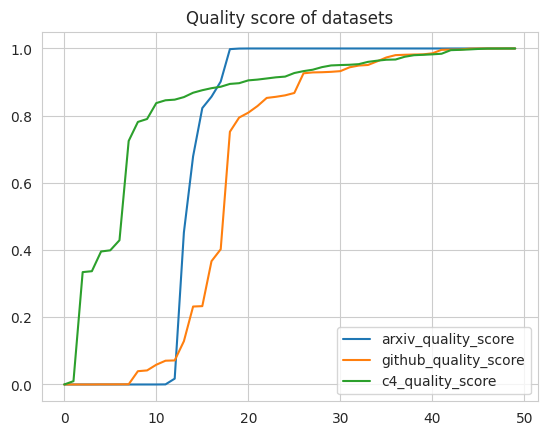

In [10]:
from pandas import DataFrame
score_df = DataFrame(dict(arxiv_quality_score = arxiv_quality_classifier_pd["doc_score"].sample(50).sort_values(ascending=True).reset_index(drop=True),
               github_quality_score = github_quality_classifier_pd["doc_score"].sample(50).sort_values(ascending=True).reset_index(drop=True),
               c4_quality_score = c4_quality_classifier_pd["doc_score"].sample(50).sort_values(ascending=True).reset_index(drop=True)))
score_df.plot(y=["arxiv_quality_score", "github_quality_score", "c4_quality_score"], kind="line", title="Quality score of datasets")